## Project 1 

### `Problem Statement`

This is heart disease prediction model - We are given clinical parameters about a patient, can we predict whether or not they have heart disease?


### `Data`

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

### `Motive`

We will try to reach a good predicting accuracy

### `Features`

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

##### Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything  above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
        *Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
13. thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising

14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)



In [1]:
# We will import the required modules to make the model 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# to make it appear inside the notebook 
%matplotlib inline 

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [2]:
# Now check our data and getting to know about it 
data = pd.read_csv('data/heart-disease.csv')
data.head()
# it shows that all the data is already numerical in nature.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# We have to understand about our data to make a most accurate model 

# To check number of data sets 
print("Total number of rows and columns are -: ",data.shape)

# check datatypes
data.dtypes
# checking if any null values are there or missing data 

data.isna().sum()

Total number of rows and columns are -:  (303, 14)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The value count of 1 and 0 is -  target
1    165
0    138
Name: count, dtype: int64


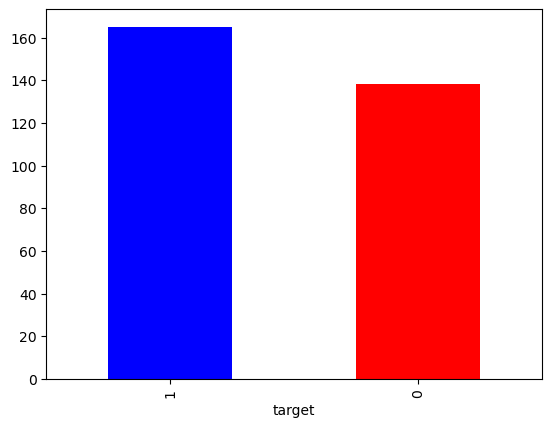

In [5]:

# Finding the total target value and its distribution 
print('The value count of 1 and 0 is - ',data['target'].value_counts())
data['target'].value_counts().plot(color={'red','blue'},kind='bar')
plt.show();

In [6]:
## Now checking how target value is affected by different columns 
## Let us say we are comparing sex column 

data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

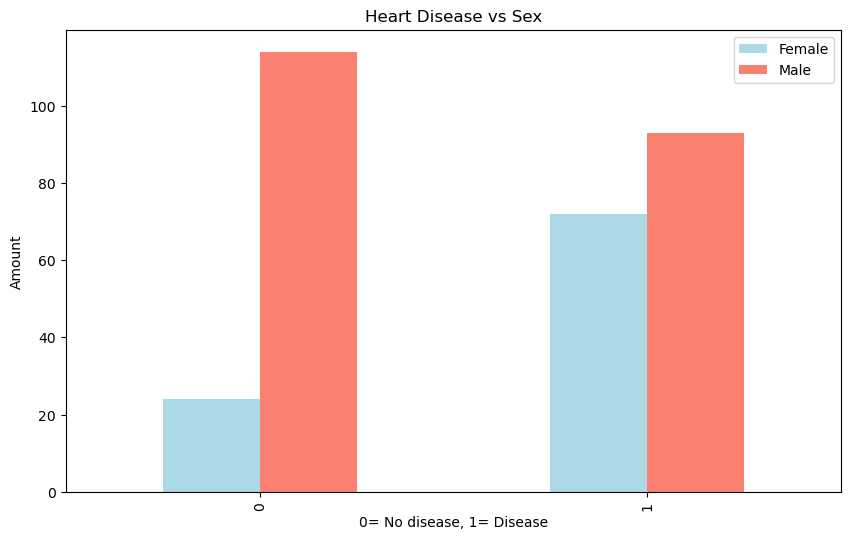

In [7]:
# This tells a good picture that which sex has how many chances of having a heart disease normally 
pd.crosstab(data.target,data.sex)

# We can try plotting it 
pd.crosstab(data.target,data.sex).plot(kind='bar', figsize=(10,6), color=['lightblue','salmon'])
plt.title("Heart Disease vs Sex");
plt.xlabel("0= No disease, 1= Disease");
plt.ylabel("Amount");
plt.legend(['Female','Male']);
plt.show();


In [8]:
# Now checking more things like reltion btw age and max heart rate 
pd.crosstab(data.age,data.thalach).head()

thalach,71,88,90,95,96,97,99,103,105,106,...,184,185,186,187,188,190,192,194,195,202
age,,,,,,,,,,,,,,,,,,,,,
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


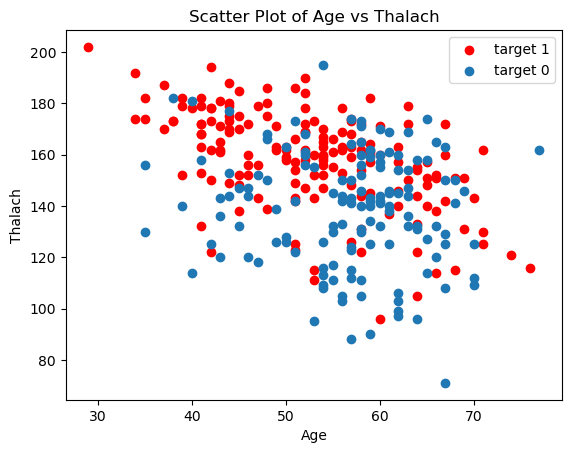

In [9]:
# plotting the ages and max heart rate of who are having heart disease
filtered_data = data[data['target'] == 1]
plt.scatter(filtered_data['age'], filtered_data['thalach'],color='red')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.title('Scatter Plot of Age vs Thalach')

filtered_dat = data[data['target'] == 0]
plt.scatter(filtered_dat['age'], filtered_dat['thalach'])
plt.legend(['target 1', 'target 0'])
plt.show();

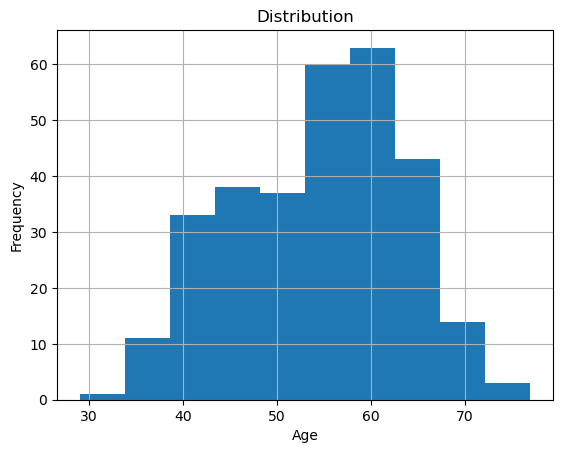

In [10]:
# checking how age is distributed
data.age.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.show();

In [11]:
# Making a correlation Matrix
# Here negative sign shows inverse relation otherwise direct relation 
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


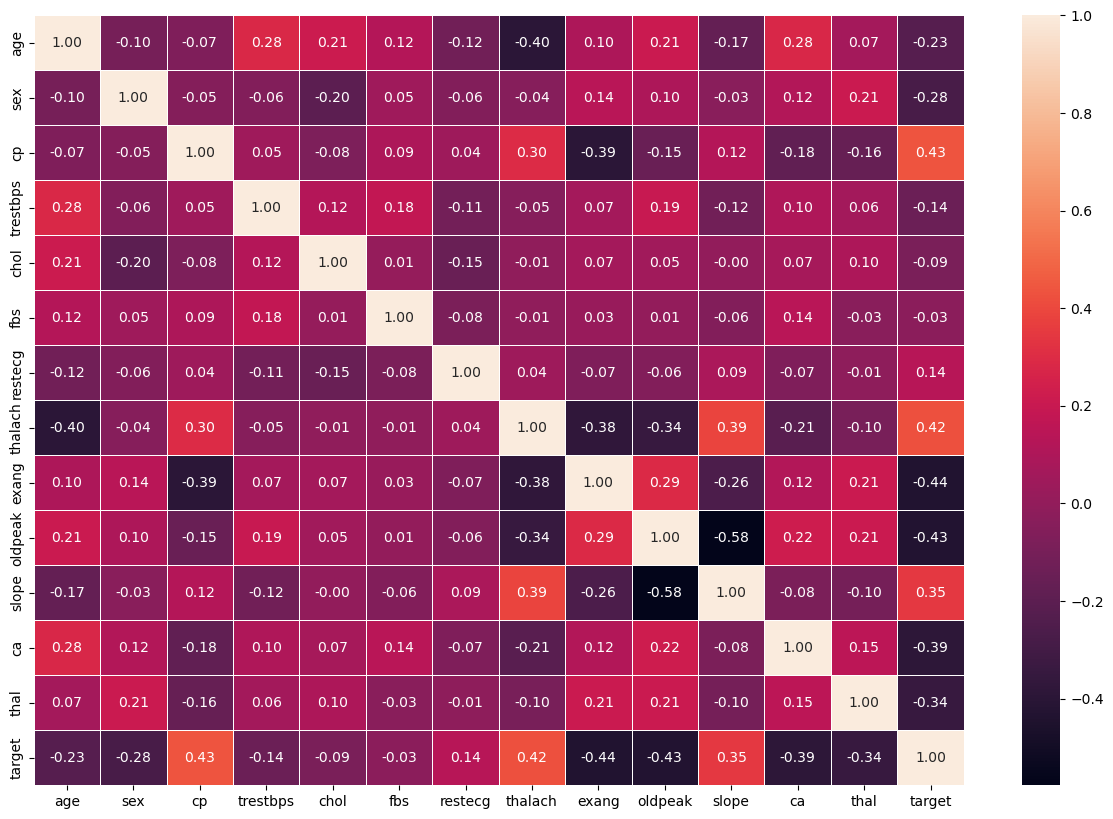

In [12]:
# We can make it prettier using seabrorn 

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt='.2f')
plt.show();

In [13]:
# Preparing our Data for model 
X = data.drop('target',axis=1)
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2)

 # We will try using three differnt models to get better accuracy
1. Logistic Regression 
2. K-Nearst Neighbours Classifier
3. Random Forest Classifier


In [14]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test,Y_train,Y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name] = model.score(X_test,Y_test)

    return model_scores

model_scores = fit_and_score(models, X_train, X_test,Y_train,Y_test)
model_scores

C:\Users\karrt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8360655737704918}

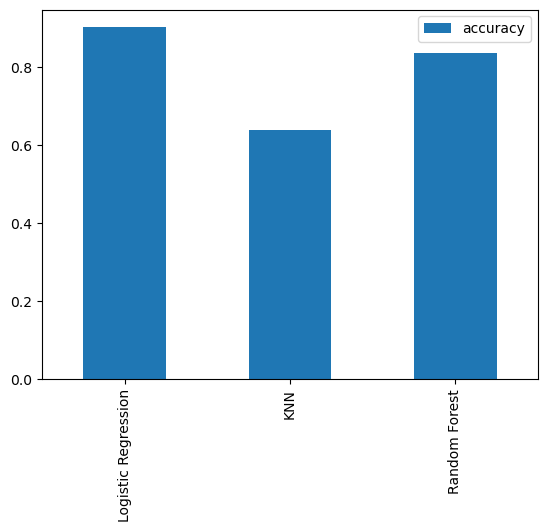

In [15]:
### Model Comparision

model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();
plt.show();

In [23]:
# Hyperparameter Tuning 
 # We will try to the Kneigbors first

train_scores = []
test_scores = []

knn = KNeighborsClassifier();

for i in range(1,21):
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

train_scores, test_scores


([1.0,
  0.7975206611570248,
  0.7892561983471075,
  0.7768595041322314,
  0.7644628099173554,
  0.756198347107438,
  0.7479338842975206,
  0.71900826446281,
  0.7024793388429752,
  0.7107438016528925,
  0.6983471074380165,
  0.7024793388429752,
  0.6776859504132231,
  0.6900826446280992,
  0.7107438016528925,
  0.7148760330578512,
  0.6942148760330579,
  0.6983471074380165,
  0.6776859504132231,
  0.6818181818181818],
 [0.5737704918032787,
  0.5737704918032787,
  0.639344262295082,
  0.6229508196721312,
  0.639344262295082,
  0.639344262295082,
  0.6557377049180327,
  0.6229508196721312,
  0.639344262295082,
  0.639344262295082,
  0.6721311475409836,
  0.6557377049180327,
  0.6557377049180327,
  0.639344262295082,
  0.639344262295082,
  0.6229508196721312,
  0.6721311475409836,
  0.6721311475409836,
  0.6721311475409836,
  0.6557377049180327])

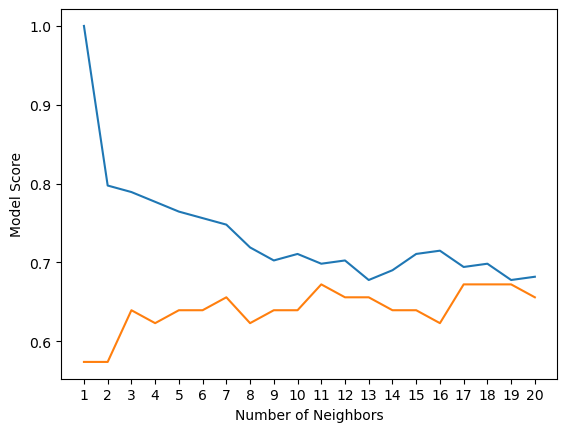

In [18]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.show()

In [24]:
print(f"Max Test score by KNN Model is , {max(test_scores)*100:.2f}%")

Max Test score by KNN Model is , 67.21%


# Hyperparameter tuning by randomizedSearchCVmm

In [50]:
# We have various hyperparameters so we choose the best one out of them. FOR LogisticRegression and RandomForestCllassifier

log_reg_grids = {"C": np.logspace(-4,4,20),
                 "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2)}


In [51]:
# Tune it 
np.random.seed(42)

# Seting it up
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                     param_distributions = log_reg_grids,
                               cv = 5,
                               n_iter = 20,
                               verbose=True)

rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [53]:
rs_log_reg.score(X_test,Y_test)

0.9016393442622951

In [54]:
# Let's try Randomforest
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [60]:
print(f"{rs_rf.score(X_test,Y_test)*100}%")

85.24590163934425%


# Now we have tried by hand, RandomSearchCV and will try to improve by GridSearchCV

In [67]:
log_reg_grids = {"C": np.logspace(-4,4,20),
                 "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grids,
                          cv=5,
                         verbose=True)
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [68]:
gs_log_reg.score(X_test,Y_test)

0.9016393442622951

In [70]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

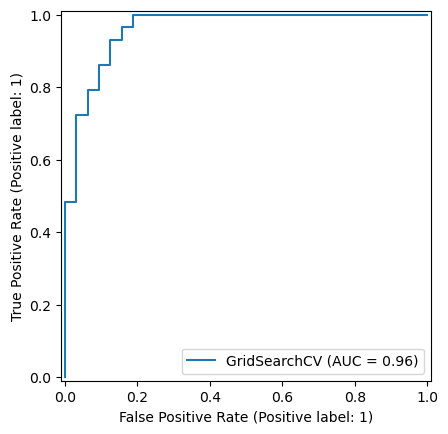

In [78]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, Y_test)
plt.show();

In [80]:
print(confusion_matrix(Y_test,y_preds))

[[27  5]
 [ 1 28]]


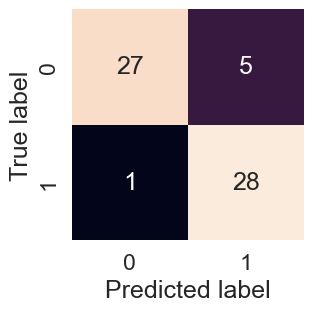

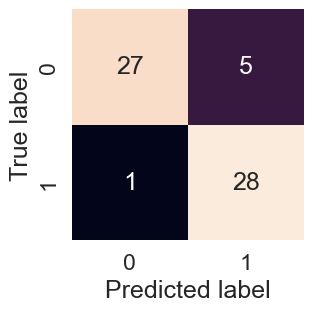

In [83]:
# Evaluating beyond accuracy using ROC,AUC,f1 score, Precisio, Recall, etc
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    plt.show();
    
plot_conf_mat(Y_test, y_preds)


In [84]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.85      0.97      0.90        29

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [86]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [88]:
# using cross vailidation 
clf = LogisticRegression(C=0.08858667904100823, solver="liblinear")

In [89]:
# Cross-validated scores 
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
np.mean(cv_acc)

0.834808743169399

In [90]:
cv_pre = cross_val_score(clf,X,Y,cv=5,scoring="precision")
np.mean(cv_pre)

0.8182683982683983

In [91]:
cv_recall = cross_val_score(clf,X,Y,cv=5,scoring="recall")
np.mean(cv_recall)

0.9030303030303031

In [92]:
cv_f1 = cross_val_score(clf,X,Y,cv=5,scoring="f1")
np.mean(cv_f1)

0.8572876223964055

# Feature Importance
Which feature contribute most of the model and how they contribute - it varies according to the model 

In [93]:
clf = LogisticRegression(C=0.08858667904100823, solver="liblinear")
clf.fit(X_train,Y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [94]:
clf.coef_

array([[-0.00260442, -0.53377784,  0.56843798, -0.01199191, -0.00338252,
        -0.03274103,  0.23587797,  0.02659146, -0.41763341, -0.37086332,
         0.23793591, -0.46770972, -0.46501298]])

In [97]:
feature_dict = dict(zip(data.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.002604415068094324,
 'sex': -0.5337778423007433,
 'cp': 0.5684379787743202,
 'trestbps': -0.01199190758823801,
 'chol': -0.0033825168405563814,
 'fbs': -0.03274102822985984,
 'restecg': 0.23587796780577985,
 'thalach': 0.02659146057425032,
 'exang': -0.41763340951522204,
 'oldpeak': -0.37086331915065035,
 'slope': 0.23793591147020196,
 'ca': -0.46770972032071756,
 'thal': -0.4650129799623999}

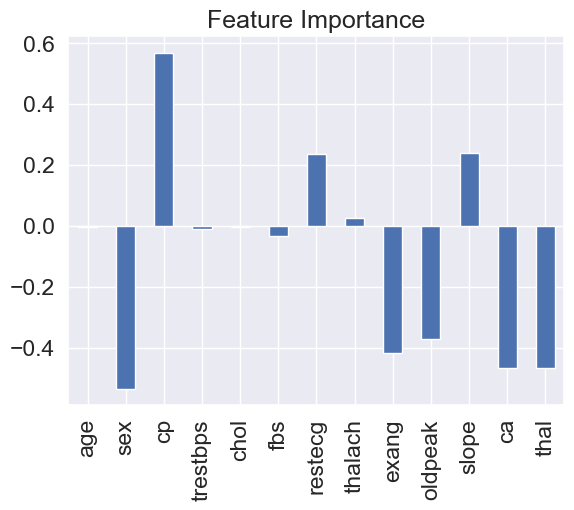

In [101]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)
plt.show();

In [102]:
pd.crosstab(data['sex'],data['target'])

target,0,1
sex,,
0,24,72
1,114,93


To make it better we can try catboost or XGBoost

# At last the best accuracy is received by LogisticRegression of 90+%